In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 컬럼 설명
  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다.
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4)
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)
  * **atemp** - 체감 온도. 섭씨(Celsius)
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑 = 비회원(casual) + 회원(registered)

In [4]:
#날짜컬럼 전처리 - 날짜데이터를 연,월,일,시, 분 단위로 분리시킨다. 

train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()


(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [36]:
#test칼럼 년월일시 전처리 
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()


(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


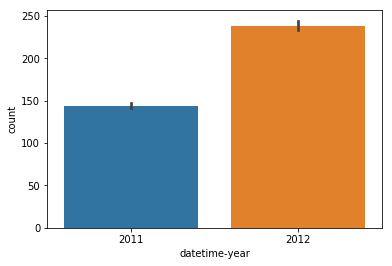

In [5]:
#연도별 

sns.barplot(data=train, x="datetime-year", y = "count")

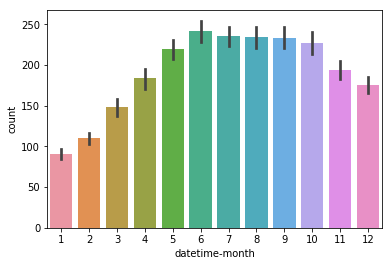

In [6]:
#월별

sns.barplot(data=train, x="datetime-month", y = "count")

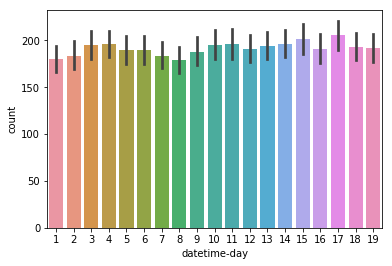

In [7]:
#일별
#train인 19일까지 존재하는 것을 알 수 있다. 

sns.barplot(data=train, x="datetime-day", y = "count")

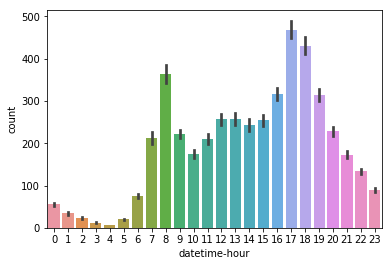

In [8]:
#시간별
#출퇴근시간대가 비교적 대여량이 높음 

sns.barplot(data=train, x="datetime-hour", y = "count")

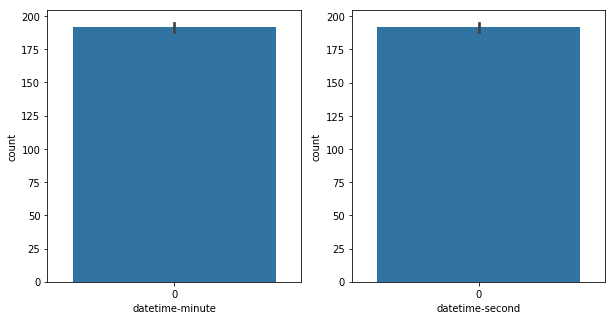

In [9]:
#분별, 초별 - 모두 00:00 으로 확인된다.
#즉, 크게 영향을 미치는 컬럼은 아니라는 것을 확인할 수 있다. 

figure, ((ax1, ax2)) = plt.subplots(ncols=2)

figure.set_size_inches(10,5)

sns.barplot(data=train, x="datetime-minute", y = "count", ax=ax1)
sns.barplot(data=train, x="datetime-second", y = "count", ax=ax2)

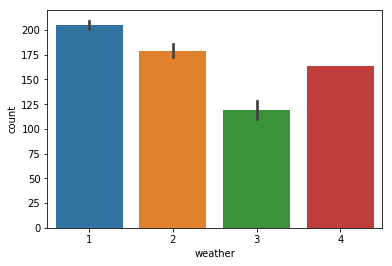

In [10]:
#계절별 확인 

sns.barplot(data=train, x ="weather", y = "count")

In [11]:
#날씨컬럼 중 가장 좋지 않은 날의 데이터는 단 1개뿐. -신뢰성을 얻지 못함. 
#날씨컬럼을 one-hot-encoding으로 만들어도 괜찮을 것 같다. 
#확실히 가장 좋은 날인 1이 대여량이 많은 것 같다. 

train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

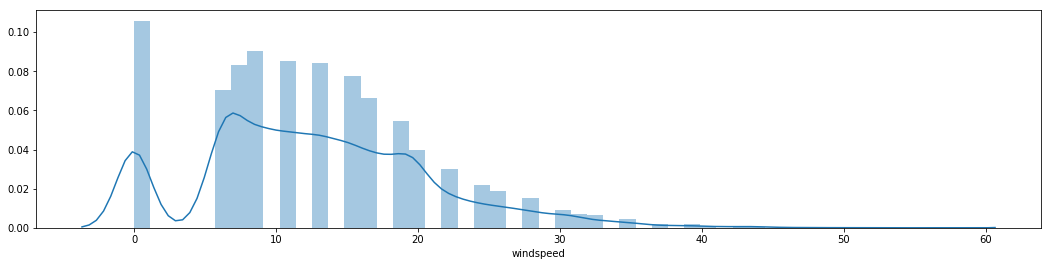

In [12]:
# windspeed - 풍속 
# 바람이 적당히 많이 부는 날 보다 적당히 부는 날씨가 대여량이 더 많을 듯. 

plt.figure(figsize = (18, 4))

sns.distplot(train["windspeed"])

#풍속이 '0'인 컬럼도 존재하고, 40이상 부는 데이터도 간간히 보인다. 
#풍속이 '0'인 경우에는 미입력을 예상해볼 수 있고, 40이상은 아웃라이어일 수도 있을 듯하다.

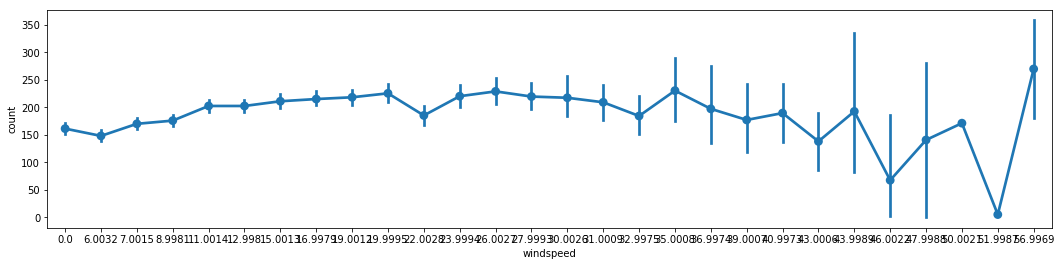

In [13]:
#풍속과 대여량 

plt.figure(figsize=(18, 4))

sns.pointplot(data=train, x = "windspeed", y = "count")

In [14]:
#풍속인데도 데이터가 정형화 된 느낌. 
#소수점 4자리까지 존재 
train["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [37]:
#test 풍속 특징
#train과 비슷하게도 생각보다 종류가 많지 않다. 

test["windspeed"].value_counts()

0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
6.0032     553
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
39.0007     17
36.9974     17
40.9973     12
43.9989      3
46.0022      2
43.0006      2
54.0020      2
50.0021      1
55.9986      1
Name: windspeed, dtype: int64

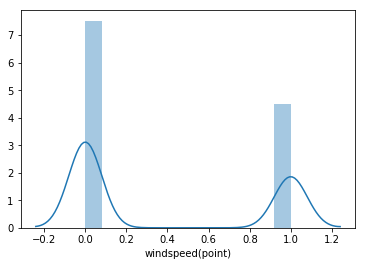

In [15]:
#소수점 앞자리를 제거한다면. 
#정규분포가 나오지만, 풍속'0이 많고, 값이 연속적이라기보다는 떨어져있는 것을 확인할 수 있음. 
#바람이 적게불 때 보다, 많이 불 때 더 많이 대여하는 것을 알 수 잇음. 

train["windspeed(point)"] = train["windspeed"] -train["windspeed"].astype('int')

train["windspeed(point)"].unique().round(3)

sns.distplot(train["windspeed(point)"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


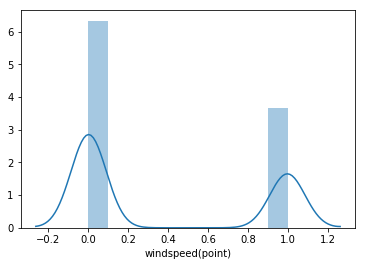

In [38]:
#test 전처리 

test["windspeed(point)"] = test["windspeed"] -test["windspeed"].astype('int')

test["windspeed(point)"].unique().round(3)

sns.distplot(test["windspeed(point)"])

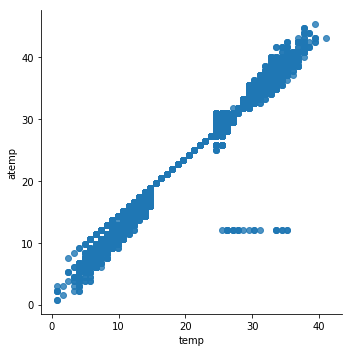

In [16]:
# 온도 시각화 
# 온도는 두가지, 체감온도와 일반 온도가 있기에 둘의 상관관계 확인
# 일부 아웃라이어도 보이고... 

sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

In [17]:
#생각보다 종류가 별로 없음. 
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [39]:
#test - temp 

test["temp"].unique()

array([10.66,  9.84,  9.02, 11.48, 12.3 , 13.12,  8.2 ,  6.56,  5.74,
        4.92,  4.1 ,  3.28,  2.46,  1.64,  0.82,  7.38, 13.94, 14.76,
       17.22, 15.58, 16.4 , 21.32, 22.14, 22.96, 18.86, 18.04, 19.68,
       20.5 , 23.78, 25.42, 27.06, 28.7 , 30.34, 31.16, 27.88, 24.6 ,
       26.24, 29.52, 31.98, 33.62, 32.8 , 35.26, 36.08, 36.9 , 34.44,
       37.72, 38.54, 39.36, 40.18])

In [18]:
#체감온도도 마찬가지. 
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [40]:
test["atemp"].unique()

array([11.365, 13.635, 12.88 , 10.605, 16.665, 14.395, 15.15 , 15.91 ,
       12.12 ,  9.85 ,  9.09 ,  8.335,  7.575,  6.06 ,  6.82 ,  5.305,
        3.79 ,  1.515,  2.275,  0.   ,  0.76 ,  3.03 ,  4.545, 17.425,
       18.18 , 21.21 , 19.695, 20.455, 25.   , 25.76 , 26.515, 22.725,
       21.97 , 23.485, 24.24 , 27.275, 30.305, 31.06 , 32.575, 33.335,
       31.82 , 29.545, 28.79 , 28.03 , 34.09 , 34.85 , 37.12 , 38.635,
       37.88 , 36.365, 35.605, 40.15 , 39.395, 41.665, 40.91 , 42.425,
       43.18 , 44.695, 46.21 , 45.455, 47.725, 49.24 , 50.   , 43.94 ,
       18.94 ])

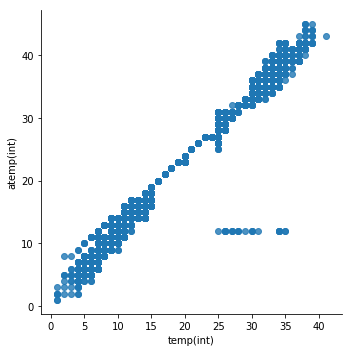

In [19]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

#크게 바뀌 건 없어보이지만.... 
sns.lmplot(data=train, x="temp(int)", y = "atemp(int)", fit_reg = False)

In [41]:
#test -temp, atemp 전처리

test["temp(int)"] = test["temp"].round()
test["atemp(int)"] = test["atemp"].round()

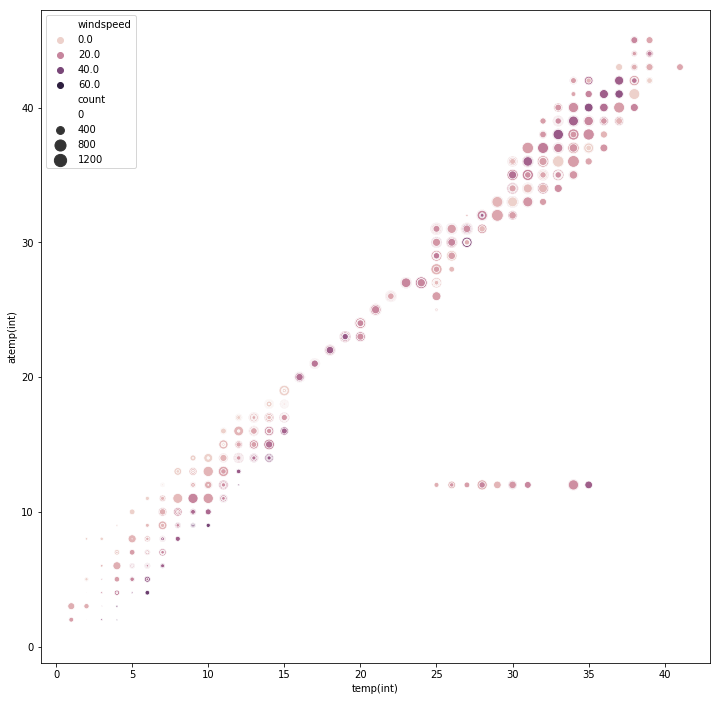

In [20]:
#scatterplot을 사용해서 온도, 체감온도, 풍속, 대여량의 상관관계 확인해보기 
#사실 큰 상관관계는 잘 모르겠다. 온도가 높을수록, 체감온도가 높을수록 풍속은 적당함(20-40)을 유지하고 있다. 
plt.figure(figsize = (12, 12))
sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0, 150))

In [21]:
# 온도-체감온도를 빼보자. 

train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]
train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


In [42]:
# test 온도-체감온도를 빼보자. 

test["temp(difference)"] = test["temp(int)"] - test["atemp(int)"]
test[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,11.0,11.0,0.0
1,11.0,14.0,-3.0
2,11.0,14.0,-3.0
3,11.0,13.0,-2.0
4,11.0,13.0,-2.0


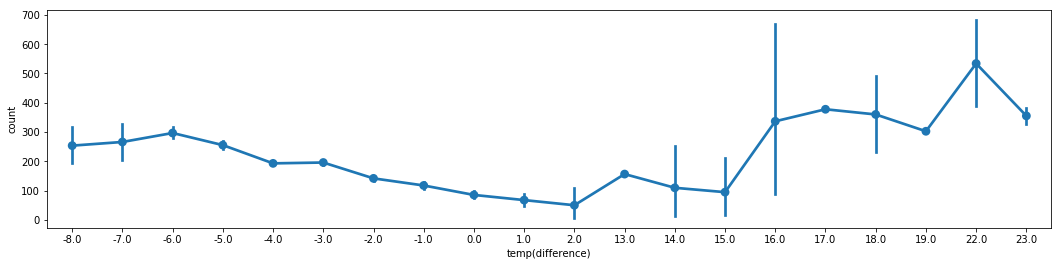

In [22]:
#신뢰성을 확보하지 못한 컬럼들이 몇개 보인다. 
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="temp(difference)", y = "count")

In [23]:
train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

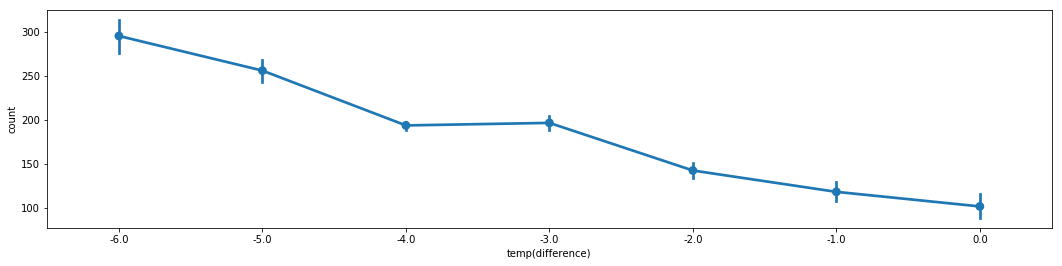

In [24]:
#-6도 이상 차이가 날 경우 가장 대여량이 많다. (체감온도가 더 높은 경우에 더 많이 빌리는듯)
#체감온도와 일반 측정상 온도에 큰 차이가 없을 경우, 대여량은 그다지 많지 않다. 
#체감온도와 측정온도가 큰 차이가 나는 경우는, 날씨가 매우 더울때, 매우 추울때, 일교차가 클 때-정도로 생각해볼 수 있다.

train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] >  0, "temp(difference)"] = 0

plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="temp(difference)", y="count")

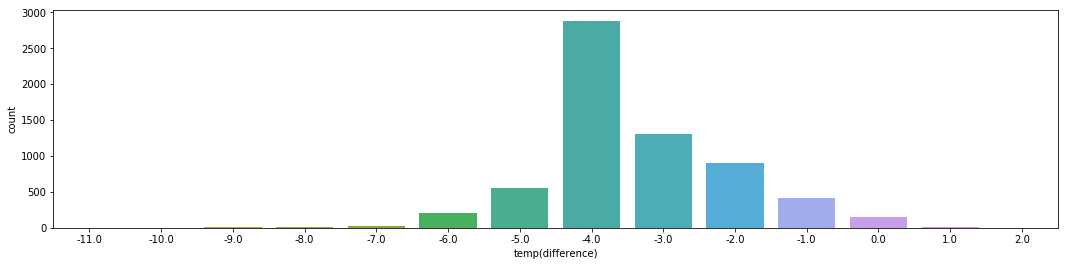

In [47]:
#test - temp, atemp 전처리 똑같이. 
#tets에는 count컬럼이 없어서 count로 확인.-대여량이 아님. 

test.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
test.loc[train["temp(difference)"] >  0, "temp(difference)"] = 0

plt.figure(figsize = (18,4))
sns.countplot(data=test, x="temp(difference)")

In [46]:
#요일별 비교량 

train["datetime-dayofweek"] = train["datetime"].dt.day_name()

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 24)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


In [48]:
#test 요일별 비교량 

test["datetime-dayofweek"] = test["datetime"].dt.day_name()

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 20)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,Thursday
1,2011-01-20 01:00:00,Thursday
2,2011-01-20 02:00:00,Thursday
3,2011-01-20 03:00:00,Thursday
4,2011-01-20 04:00:00,Thursday


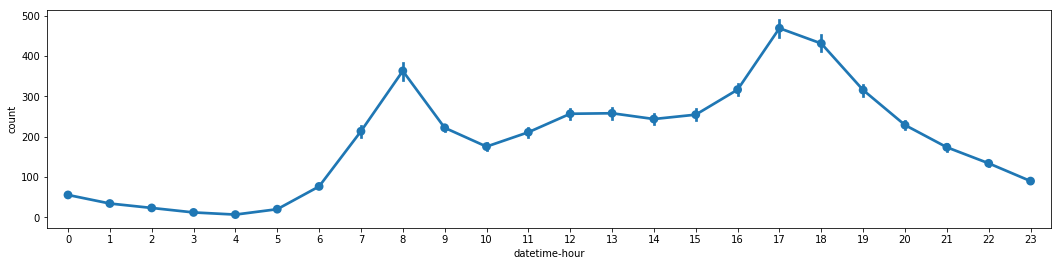

In [26]:
#먼저 시간별 대여량 비교
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="datetime-hour", y ="count")

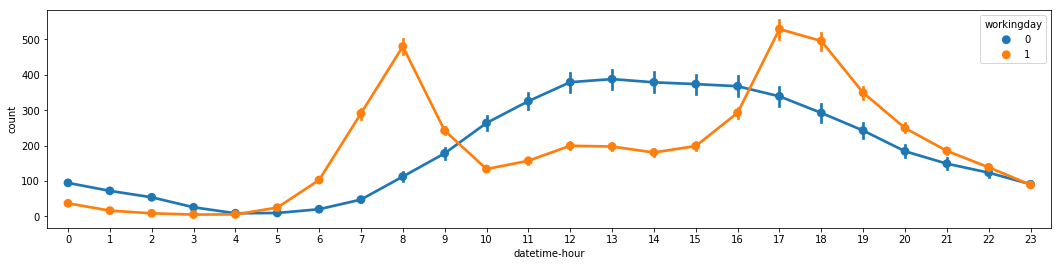

In [27]:
# 근무날의 시간별 대여량 비교

plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="datetime-hour", y ="count", hue ="workingday")

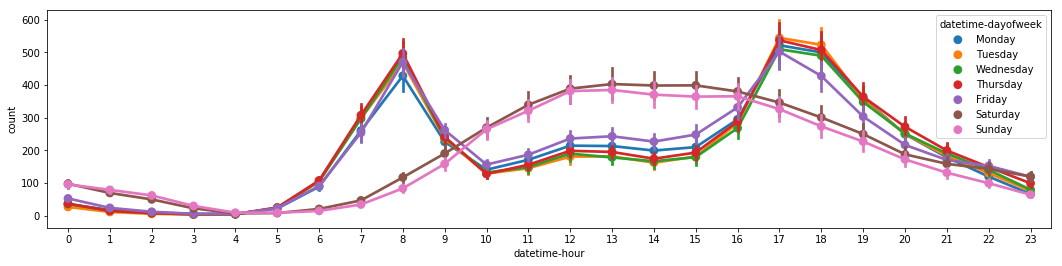

In [28]:
#요일별 시간별 대여량 비교 

#토,일은 월,화,수,목,금 주중과는 대여량이 다른 양상을 보인다. 
#금요일 저녁에는 다른 날보다 대여량이 조금 떨어진다는 것을 알 수 있다. 

plt.figure(figsize = (18,4))
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

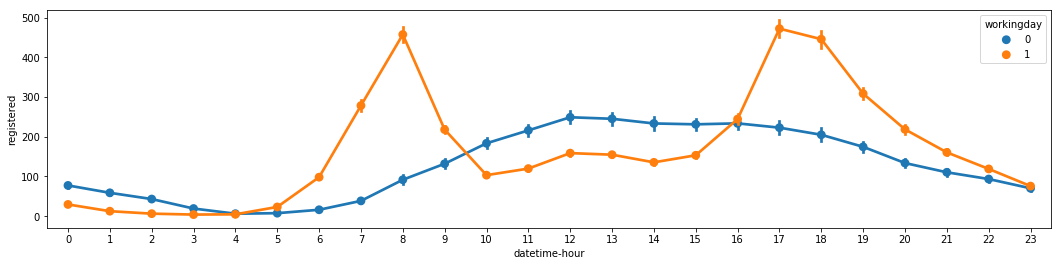

In [29]:
#회원의 시간별 대여량 확인
#전체 대여량(count)과 비슷하다. 

plt.figure(figsize = (18,4))

sns.pointplot(data=train, x = "datetime-hour", y="registered", hue ="workingday")

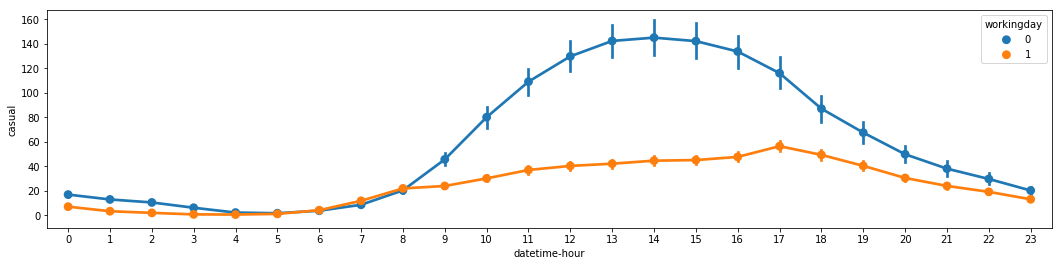

In [30]:
#비회원의 시간별 대여량
#전체적인 대여량(y축)은 떨어지만, 회원의 대여량과 다른 분포를 보임. 
#예를 들어서 회원은 근무일에 대여량이 많다고 볼 수 있다면, 비회원은 비근무일 대여량이 높은 편

plt.figure(figsize = (18,4))

sns.pointplot(data=train, x = "datetime-hour", y="casual", hue ="workingday")

In [31]:
# 연도, 월 컬럼 시각화하기 

train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 24)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [49]:
# test - 연도, 월 컬럼 붙이기

test["datetime-year_month"] = test["datetime-year"].astype('str') + '-' + test["datetime-month"].astype('str')

print(test.shape)

test[["datetime", "datetime-year_month"]].head()

(6493, 21)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


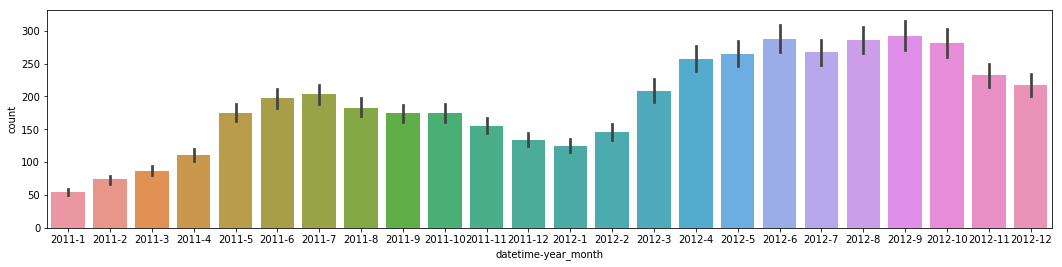

In [32]:
#이렇게보면, 위에서 보았던 월 시각화에서 생겼던 의문점 해소가능. 
#같은 겨울인데, 1월이 12월보다 대여량이 낮은가? 하는 의문점이 풀린다. 
#이 업체가 2011년 1월에 서비스를 시작했다고 가정한다면, 전체적으로 대여량이 늘어나고 있는 것을 확인할 수 있다. 
#따라서 2011년 1월에 비해 2012년 1월의 대여량이 많은 것.

plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="datetime-year_month", y="count")

In [53]:
# 머신러닝 넣기 전에 요일 컬럼을 숫자로 변환하기 

train["datetime-dayofweek"] = train["datetime"].dt.day_name()

train["datetime-dayofweek(int)"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(10886, 25)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5


In [54]:
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(6493, 22)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3


### 머신러닝 전처리

In [55]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek(int)"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek(int)']

In [56]:
label_name = "count"
label_name

'count'

In [57]:
# x_train 설정

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [58]:
#test 설정
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [59]:
# y_train 설정 

y_train = train[label_name]

print(y_train.shape)

y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### use random forest 사용

In [60]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

### fit

In [61]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

### predict 

In [62]:
predictions = model.predict(X_test)

print(predictions.shape)

predictions

(6493,)


array([ 10. ,   4. ,   3.8, ..., 112.7,  91.4,  45.9])

In [63]:
submission = pd.read_csv("sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [65]:
submission["count"] = predictions

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [66]:
submission.to_csv("bike_sharing(1).csv", index=False)